In [1]:
# The usual modular suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Of Mice & Machine Learning Mavericks
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import env
import os
from acquire import get_telco_data
from prepare import prep_telco_data

import warnings
warnings.filterwarnings('ignore')

In [239]:
def describe_data(df):
    print('The first three rows are: ')
    print('----------------------------------------------------------')
    print(df.head(3))
    print('----------------------------------------------------------')
    print("The data frame's shape is: ")
    print('-------------------------')
    print(f' Rows: {df.shape[0]} \n Columns: {df.shape[1]}')
    print('-------------------------')   
    print('The data types and column names are: ')
    print(sorted(df))
    print(df.info())
    print('----------------------------------------------------------')   
    print('The summary statistics are as follows: ')
    print('----------------------------------------------------------')
    print(df.describe())
    print('----------------------------------------------------------')      
    print(f'The number of NA\'s is:')
    print('-------------------------')
    print(df.isna().sum())
    print('-------------------------')
    print ('\nMissing values :  ', df.isnull().sum().values.sum())
    print('----------------------------------------------------------')  
    print('Unique Values for the Columns:')
    print('-------------------------')
    limit = 10
    for col in df.columns:
        if df[col].nunique() < limit:
            print(f'Column: {col} \n')
            print(f'Unique Values: {df[col].unique()} \n')
            print(f'Absolute frequencies: \n {df[col].value_counts()} \n')
            print(f'Relative frequencies: \n {df[col].value_counts(normalize=True)} \n')
        else: 
            print(f'Column: {col} \n')
            print(f'Range of Values: [{df[col].min()} - {df[col].max()}] \n')
        print('-----------------------')
    print('-------Done-zo-------------')

# Let's Explore

In [3]:
df = get_telco_data()

Using cached csv


In [4]:
train, validate, test = prep_telco_data(df)

In [5]:
list(train)

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_Yes',
 'monthly',
 'two_year_contract',
 'fiber_optic',
 'no_internet',
 'auto_bank_transfer',
 'auto_credit_card',
 'electronic_check',
 'enc_monthlycharges_group_26-50',
 'enc_monthlycharges_group_51-75',
 'enc_monthlycharges_group_76-100

In [6]:
train.shape, validate.shape, test.shape

((3937, 57), (1688, 57), (1407, 57))

In [137]:
green = '#2ca02c'
red = '#d62728'

In [181]:
def plot_target_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.pie(df.churn.value_counts(),labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(df.churn, palette=['#008000','#FF0000'])
    t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

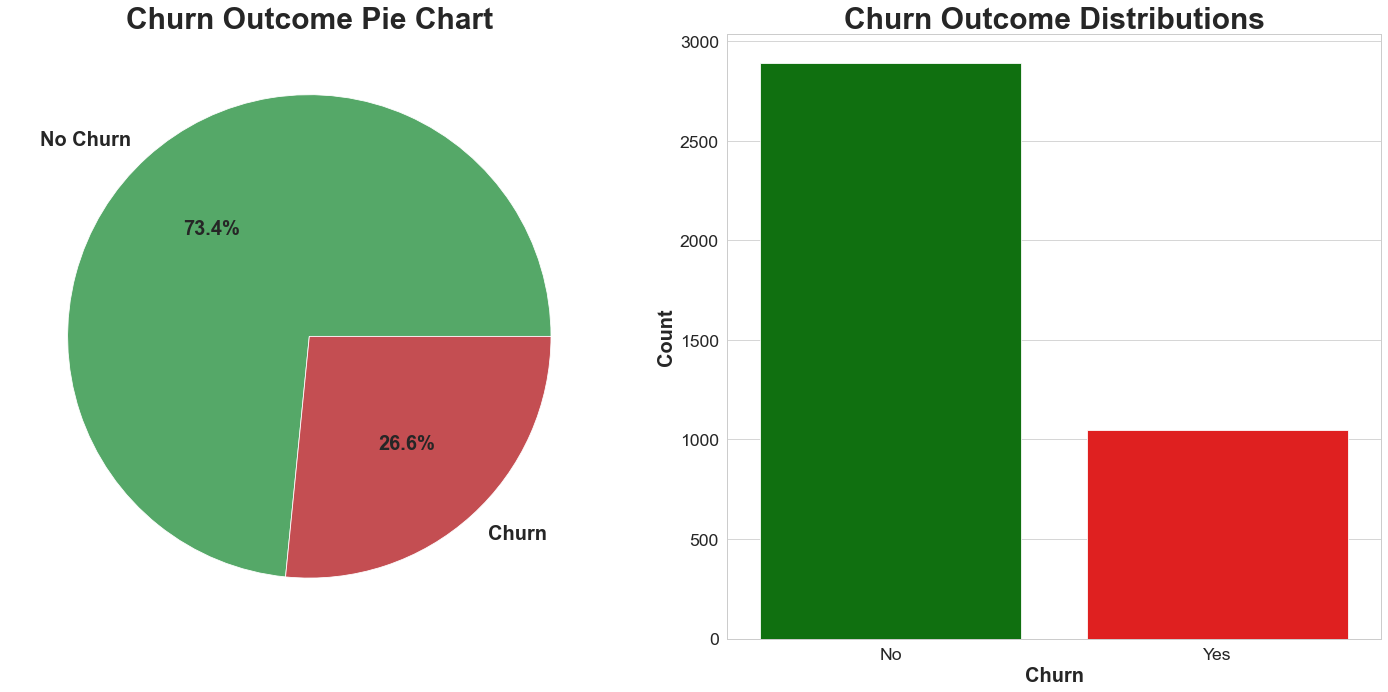

In [182]:
#plt.pie()
#sns.countplot()
plot_target_dist(train)

In [123]:
def tenure_splits(df) :   
    if df['tenure'] <= 6:
        return '1-6'
    elif (df['tenure'] > 6) & (df['tenure'] <= 12 ):
        return '7-12'
    elif (df['tenure'] > 12) & (df['tenure'] <= 18) :
        return '13-18'
    elif df['tenure'] > 18 & (df['tenure'] <= 24) :
        return '19-24'
    else:
        return '>24'

In [124]:
train['grouped_tenure'] = train.apply(lambda train: tenure_splits(train), axis = 1)

In [183]:
def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = train, x = 'grouped_tenure', hue = 'churn', palette=['#008000','#FF0000'], order = ['1-6', '7-12', '13-18', '19-24', '>24'])
    t.set_title('Churn Counts by Tenure Grouped by Months', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

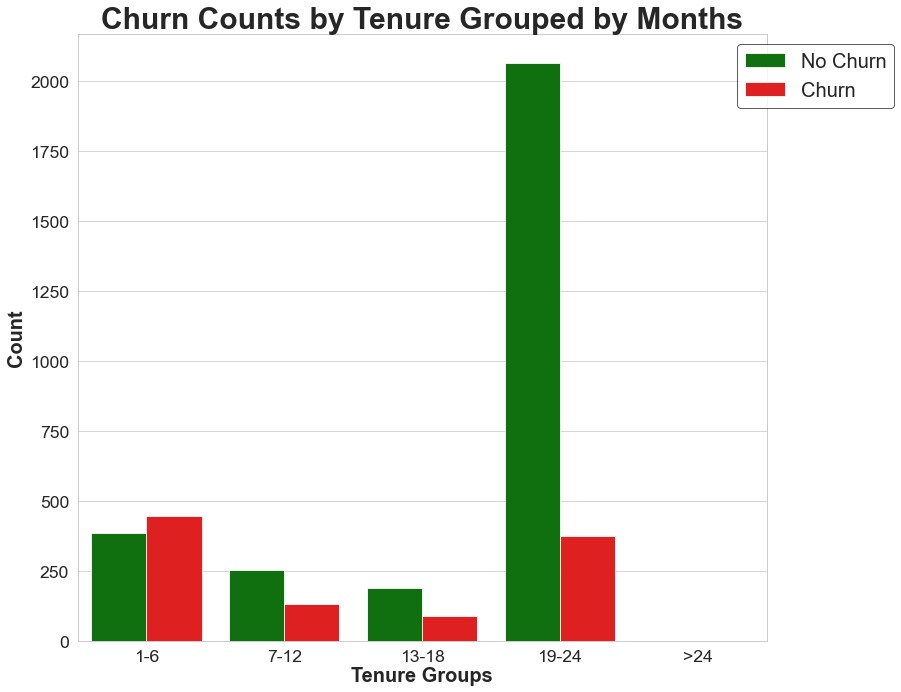

In [184]:
tenure_group_counts(train)
# >24 was dropped as a dummy variable. 

In [185]:
def plot_internet_services(df):
    
    copy = train.copy()
    fig = plt.figure(figsize = (30, 10))

    plt.subplot(131)
    plt.pie(copy.internet_service_type.value_counts(), labels = ['Fiber Optic', 'DSL', 'No Internet'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight': 'bold'}, startangle = 180)
    plt.title('Internet Service Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    copy = copy.groupby('internet_service_type')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    d = sns.barplot('internet_service_type', y = 'pct_total', hue = 'churn', palette=['#008000','#FF0000'], data = copy)
    d.set_title('% Churn by Internet Service', fontweight= 'bold', fontsize = 30)
    d.set_xlabel('')
    d.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    d.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    
   # plt.subplot(133)
   # e = sns.violinplot('internetservice', 'monthlycharges', 'churn', df, split = True)
   # e.set_title('Violin Plot: Monthly Charges by Internet Service', fontweight = 'bold', fontsize = 30)
   # e.set_xlabel('')
   # e.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
   # e.set_ylabel('Monthly Charges($)', fontweight = 'bold', fontsize = 30)

    fig.tight_layout()

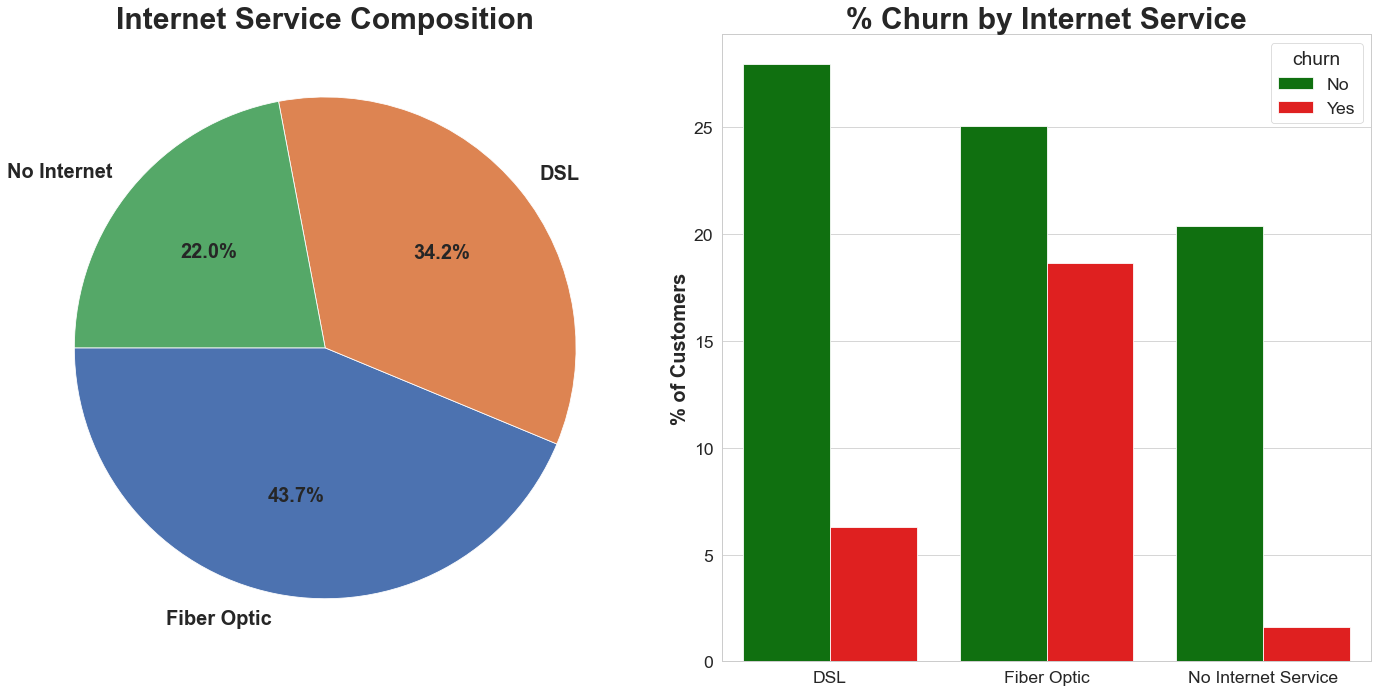

In [186]:
plot_internet_services(train)

In [10]:
X_train, y_train = train.drop(columns='churn_encoded'), train[['churn_encoded']]
X_validate, y_validate = validate.drop(columns='churn_encoded'), validate[['churn_encoded']]
X_test, y_test = test.drop(columns='churn_encoded'), test[['churn_encoded']]

In [12]:
# Establish our baseline.  The rate at which the assumption of the majority class matches the real values.
# If a model does not perform better than this, it would not be wise to deploy.
baseline = (y_train.value_counts().idxmax() == y_train).mean()
train['baseline'] = 0
baseline
accuracy_score(train.churn_encoded, train.baseline)

0.7343154686309372

In [187]:
# Create a function to generate countplots:
def countplot(x, y, df):
    plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224],
         5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}
        
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(6*columns, 6*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette=['#008000','#FF0000'], alpha=1, linewidth=0.8, edgecolor="black")
        ax.set_title(j)
        
    return plt.show

In [31]:

#countplot("churn", ['fiber', 'dsl', 'electronic_check', 'autopay', 'pays_monthly', 'two_year_contract'], train)

In [33]:
#countplot("churn", ['senior_citizen', 'is_male', 'has_partner','has_dependent', 'has_phone', 'has_internet'], train)

In [34]:
#countplot("churn", ['enc_online_security_Yes', 'enc_online_backup_Yes', 'enc_device_protection_Yes','enc_tech_support_Yes', 'enc_streaming_tv_Yes', 'enc_streaming_movies_Yes'], train)

In [35]:
#countplot("churn", ['enc_monthlycharges_group_26-50', 'enc_monthlycharges_group_51-75', 'enc_monthlycharges_group_76-100','enc_totalcharges_group_2k-4k', 'enc_totalcharges_group_4k-6k', 'enc_totalcharges_group_>6k'], train)

In [36]:
#countplot("churn", ['enc_tenure_months_1-6', 'enc_tenure_months_6-12', 'enc_tenure_months_13-18', 'enc_tenure_months_19-24'], train)

 <function show at 0x7ff54bef3e50>
 <function show at 0x7ff54bef3e50>
 <function show at 0x7ff54bef3e50>
 <function show at 0x7ff54bef3e50>
 <function show at 0x7ff54bef3e50>


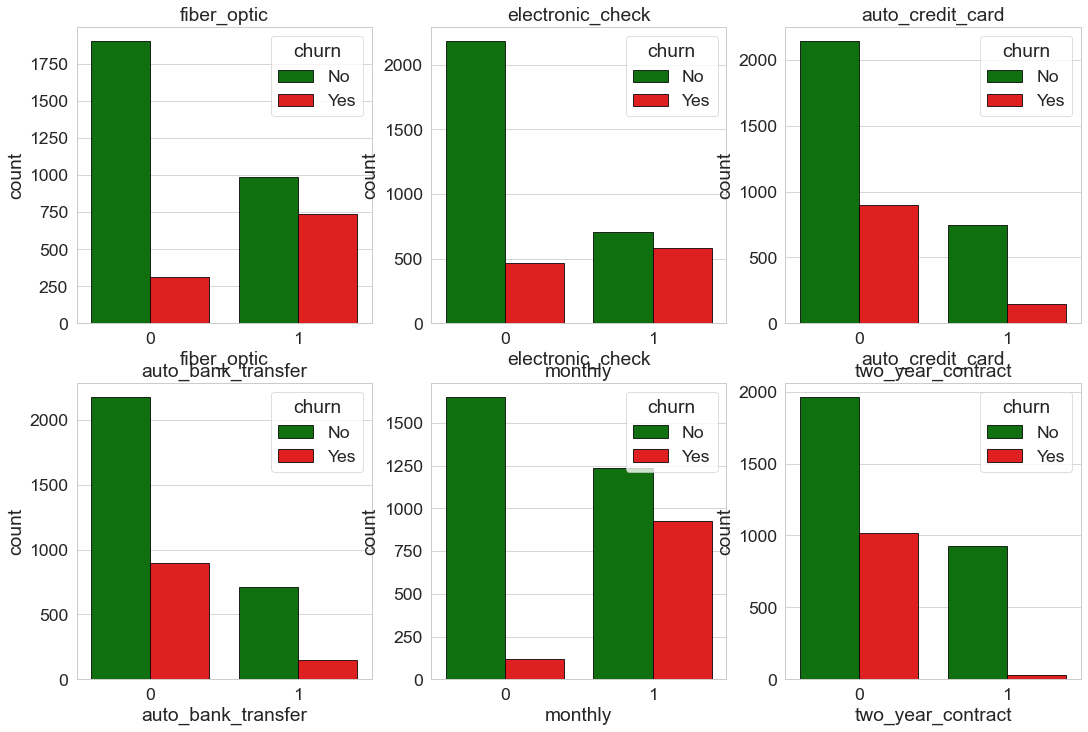

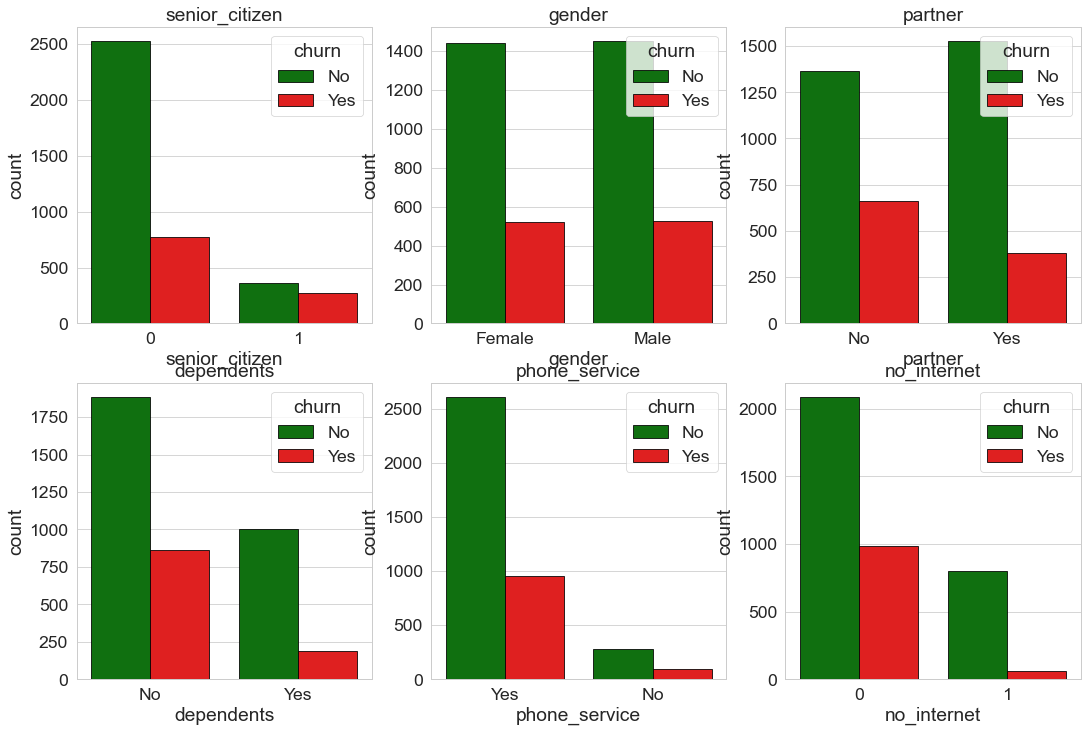

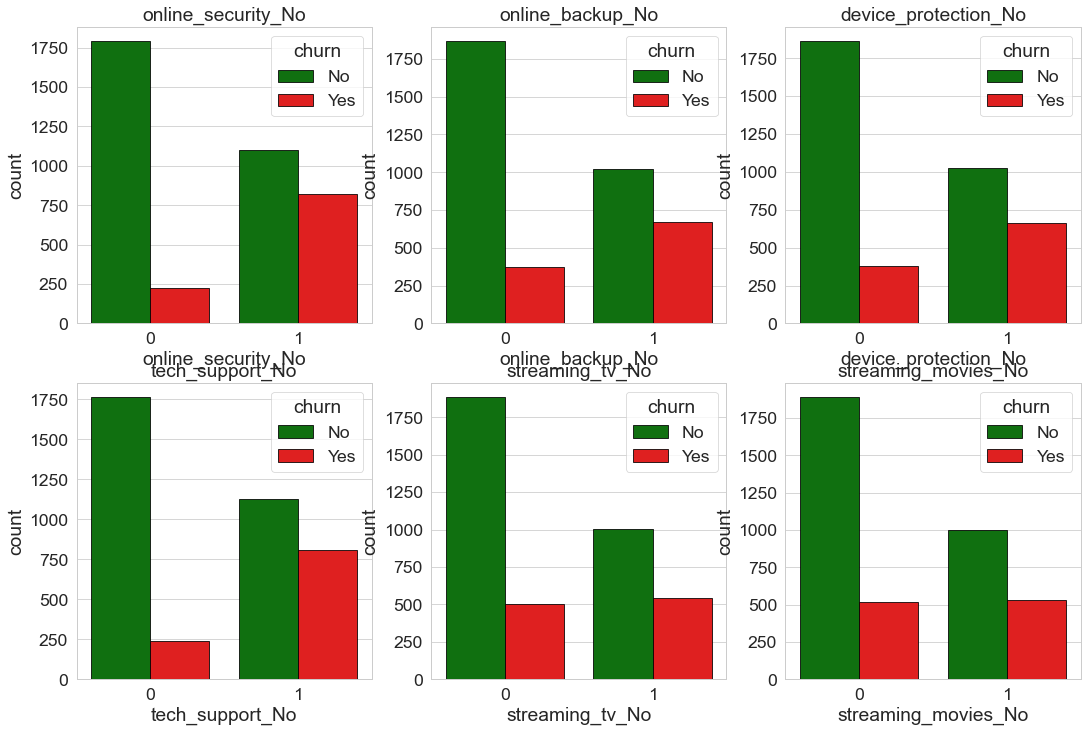

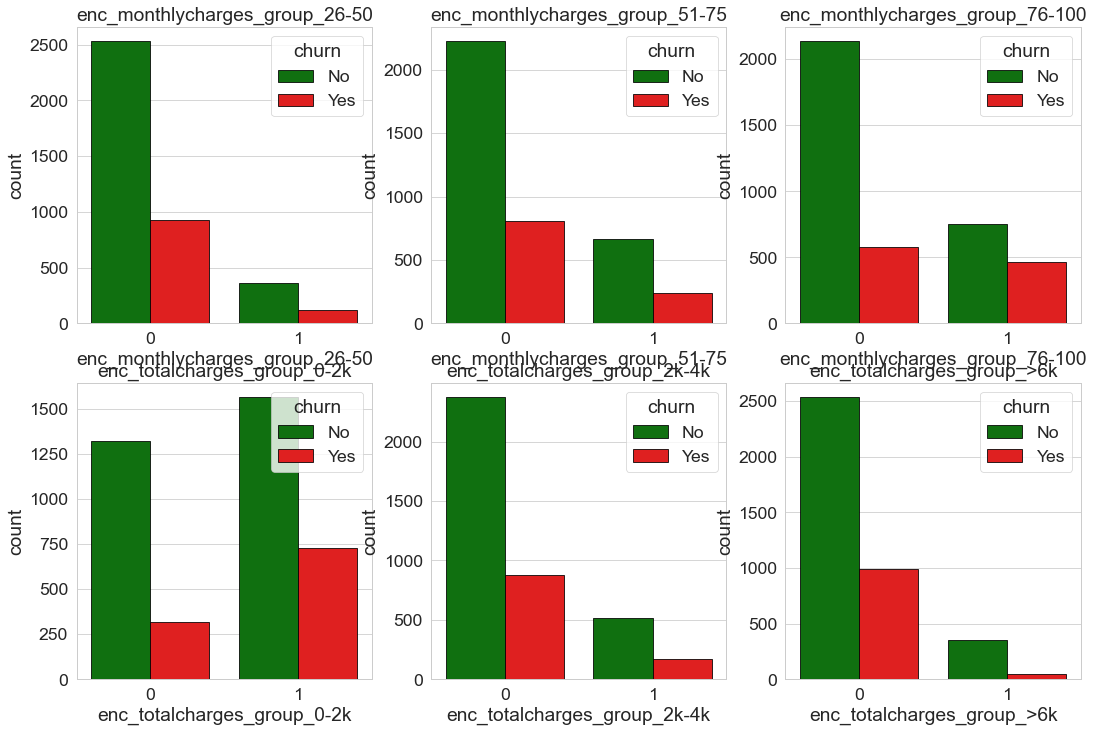

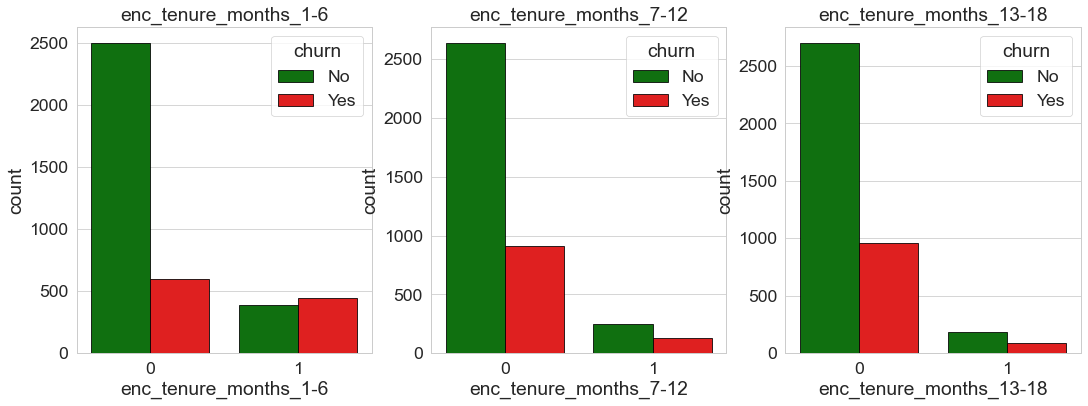

In [188]:
print(f" {countplot('churn', ['fiber_optic', 'electronic_check', 'auto_credit_card', 'auto_bank_transfer', 'monthly', 'two_year_contract'], train)}")
print(f" {countplot('churn', ['senior_citizen', 'gender', 'partner','dependents', 'phone_service', 'no_internet'], train)}")
print(f" {countplot('churn', ['online_security_No', 'online_backup_No', 'device_protection_No','tech_support_No', 'streaming_tv_No', 'streaming_movies_No'], train)}")
print(f" {countplot('churn', ['enc_monthlycharges_group_26-50', 'enc_monthlycharges_group_51-75', 'enc_monthlycharges_group_76-100', 'enc_totalcharges_group_0-2k', 'enc_totalcharges_group_2k-4k', 'enc_totalcharges_group_>6k'], train)}")
print(f" {countplot('churn', ['enc_tenure_months_1-6', 'enc_tenure_months_7-12', 'enc_tenure_months_13-18'], train)}")
#print(f' I used this as an overview to assess which ones I wish to look more closely at')

DSL, Electronic Check, Fiber, month-to-month, lack of online security and tech support, monthly charges of 76 and above, and the first 12 months of tenure are all of interest to me. 

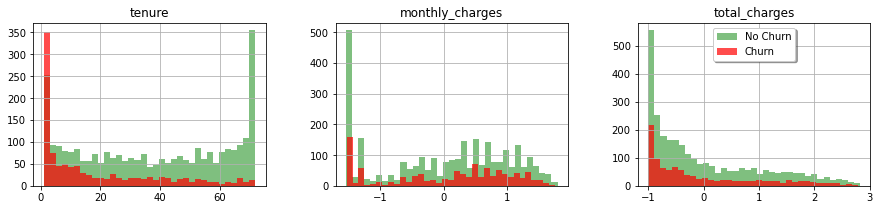

In [33]:
num_cols = ['tenure', 'monthly_charges', 'total_charges']

# look at distributions of numerical features in relation to the target variable
# the greater TotalCharges and tenure are the less is the probability of churn

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
train[train.churn_encoded == 0][num_cols].hist(bins=35, color="green", alpha=0.5, ax=ax)
train[train.churn_encoded == 1][num_cols].hist(bins=35, color="red", alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

# scaling has definitely helped with the axes. Future models may be interesting. 

No     2891
Yes    1046
Name: churn, dtype: int64
 The percentage of churn customers is 26.57%


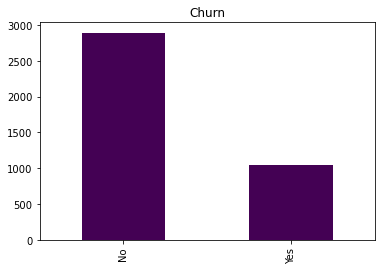

In [34]:
# curious to see if the churn percentage is roughly the same as it is in the original df
# Churn distribution is unbalanced. This was already known, but may as well be depicted. 
print(train.churn.value_counts())
train['churn'].value_counts().plot(kind='bar', colormap='viridis').set_title('Churn')
print(f' The percentage of churn customers is {1046/(2891+1046):.2%}')
# essentially exactly the same as it was before being trained. Only off at the hundreths decimal point by 1. 

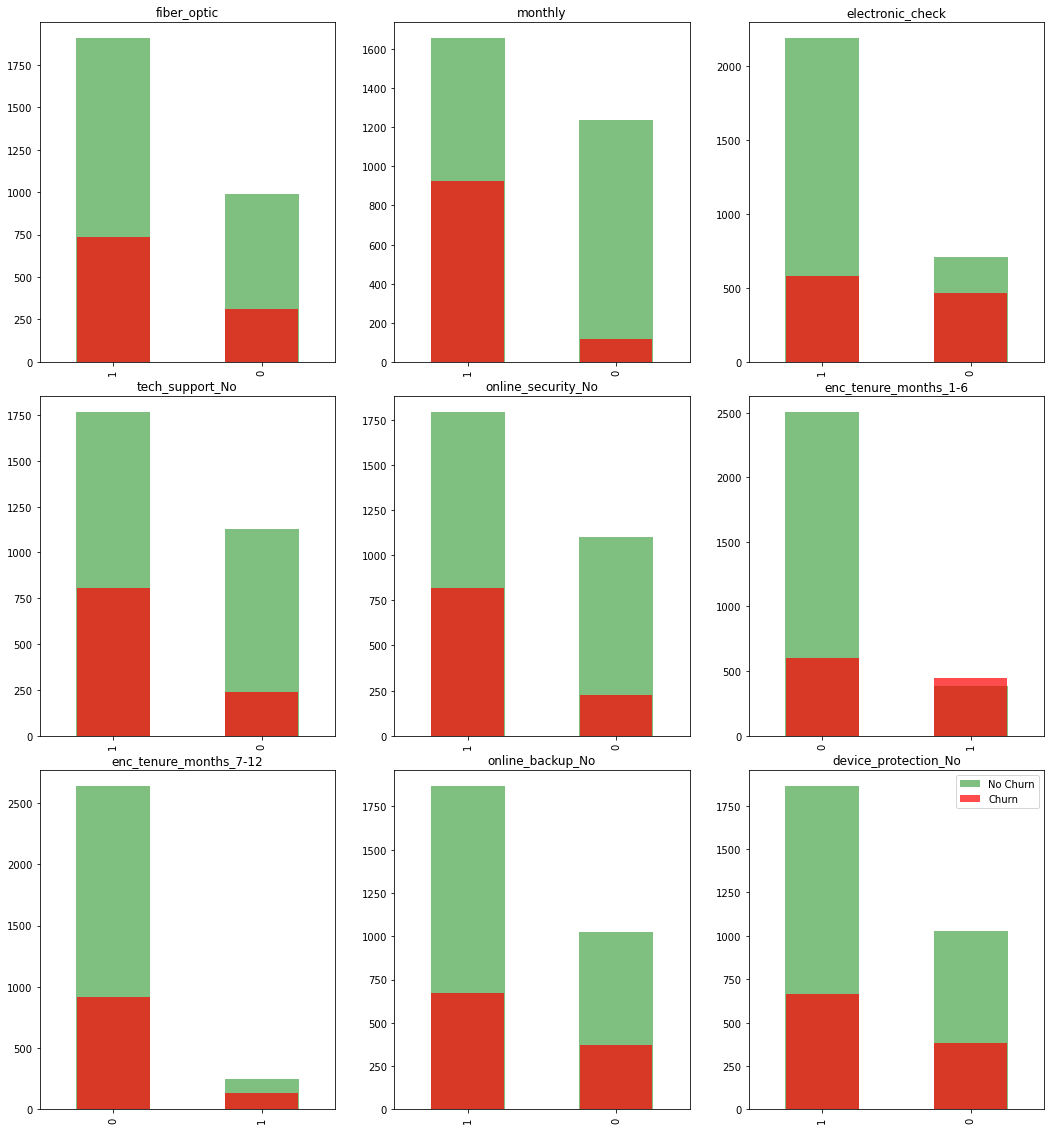

In [84]:
# categorical feature distribution, one form of analysis. 
# Note: senior citizens and customers without phone service have far less representation in the data
# "No Internet Service" is a repeated feature in 6 other charts
# This is merely a manner of visually conveying much of what is already known to me, but not
# the audience. Green is good, red is bad. 

#categorical_features = ['senior_citizen','is_male', 'has_partner', 'has_dependent',  'has_phone',
#                        'has_phone', 'has_internet','fiber', 'dsl','pays_monthly','two_year_contract',
#                        'electronic_check','autopay','enc_online_security_No','enc_online_backup_No',
#                        'enc_device_protection_No', 'enc_tech_support_No', 'enc_streaming_tv_No',
#                        'enc_streaming_movies_No','enc_monthlycharges_group_0-25','enc_monthlycharges_group_26-50',
#                        'enc_monthlycharges_group_51-75','enc_monthlycharges_group_76-100','enc_monthlycharges_group_>100',
#                        'enc_totalcharges_group_0-2k','enc_totalcharges_group_2k-4k','enc_totalcharges_group_4k-6k',
#                        'enc_totalcharges_group_>6k','enc_tenure_months_1-6','enc_tenure_months_13-18',
#                        'enc_tenure_months_19-24','enc_tenure_months_6-12'
#                       ]
# ones I am personally interested in 
categorical_features = ['fiber_optic', 'monthly', 'electronic_check',
                       'tech_support_No', 'online_security_No',
                       'enc_tenure_months_1-6', 'enc_tenure_months_7-12',
                       'online_backup_No', 'device_protection_No']

ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
#     df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)
    train[train.churn_encoded==0][categorical_feature].value_counts().plot(kind='bar', 
                width=.5, ax=ax[row, col], color='green', alpha=0.5).set_title(categorical_feature)
    train[train.churn_encoded==1][categorical_feature].value_counts().plot(kind='bar', 
                width=.49, ax=ax[row, col], color='red', alpha=0.7).set_title(categorical_feature)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.1)


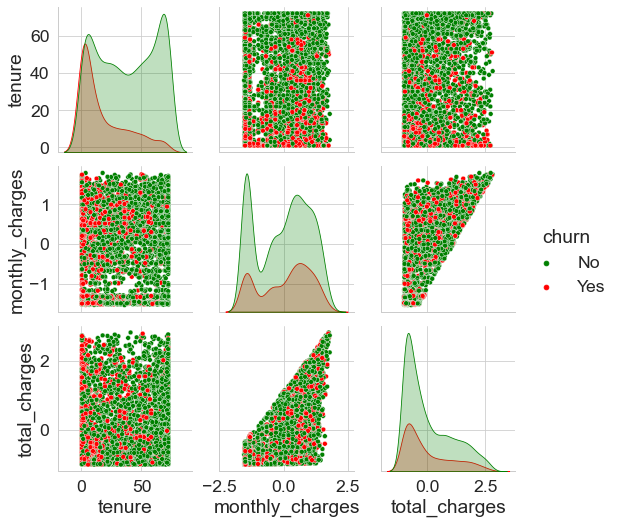

In [189]:
#Multivariate
# create and display a pairplot comparing the distributions of each quantitative variable
    # in each category of the target variable
target = 'churn'
g = sns.pairplot(train[num_cols + [target]], hue=target, palette=['#008000','#FF0000'])
plt.show()

In [86]:
print(train['online_security'].value_counts(normalize=True))

#cat_vars_2 = enumerate(categorical_features)
#print(list(cat_vars_2))

No                     0.487173
Yes                    0.292609
No internet service    0.220218
Name: online_security, dtype: float64


In [38]:
def get_churn_heatmap(df):
    plt.figure(figsize=(8,12))
    churn_heatmap = sns.heatmap(df.corr()[['churn_encoded']].sort_values(by='churn_encoded', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    churn_heatmap.set_title('Features Correlated with Churn')
    
    return churn_heatmap

<AxesSubplot:title={'center':'Features Correlated with Churn'}>

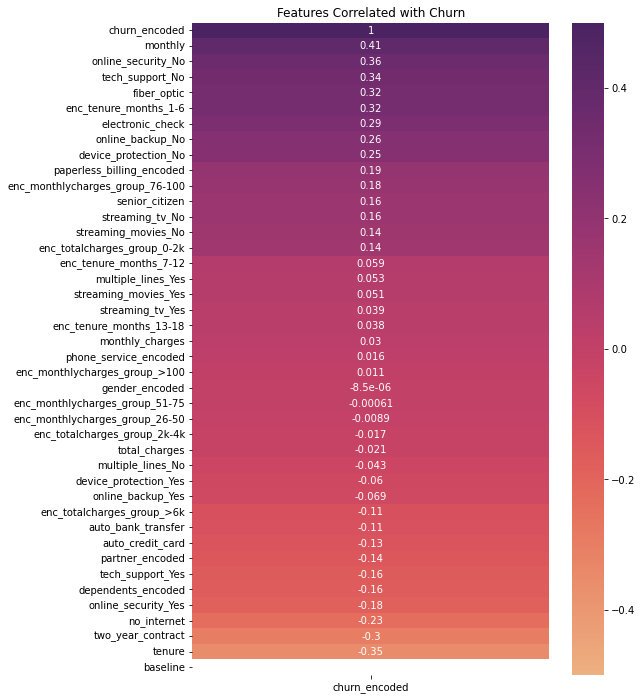

In [39]:
get_churn_heatmap(train)
# the features most strongly correlated with churn are pays_monthly, enc_tech_support_No, enc_online_security_No, fiber
# electronic_check, tenure of 1-6 months

In [238]:
describe_data(train)

The first three rows are: 
----------------------------------------------------------
      gender  senior_citizen partner dependents  tenure phone_service  \
5919  Female               0      No         No      58           Yes   
1915    Male               0      No        Yes      71           Yes   
5054  Female               0     Yes        Yes      35           Yes   

     multiple_lines      online_security        online_backup  \
5919            Yes                  Yes                  Yes   
1915            Yes                  Yes                  Yes   
5054            Yes  No internet service  No internet service   

        device_protection  ... enc_totalcharges_group_0-2k  \
5919                  Yes  ...                           0   
1915                   No  ...                           0   
5054  No internet service  ...                           1   

     enc_totalcharges_group_2k-4k enc_totalcharges_group_>6k  \
5919                            0              

Name: multiple_lines_Yes, dtype: float64
-----------------------
Column: online_security_No 

Unique Values: [0 1] 

Absolute frequencies: 
 0    2019
1    1918
Name: online_security_No, dtype: int64 

Relative frequencies: 
 0    0.512827
1    0.487173
Name: online_security_No, dtype: float64
-----------------------
Column: online_security_Yes 

Unique Values: [1 0] 

Absolute frequencies: 
 0    2785
1    1152
Name: online_security_Yes, dtype: int64 

Relative frequencies: 
 0    0.707391
1    0.292609
Name: online_security_Yes, dtype: float64
-----------------------
Column: online_backup_No 

Unique Values: [0 1] 

Absolute frequencies: 
 0    2240
1    1697
Name: online_backup_No, dtype: int64 

Relative frequencies: 
 0    0.568961
1    0.431039
Name: online_backup_No, dtype: float64
-----------------------
Column: online_backup_Yes 

Unique Values: [1 0] 

Absolute frequencies: 
 0    2564
1    1373
Name: online_backup_Yes, dtype: int64 

Relative frequencies: 
 0    0.651257
1  

In [54]:
# define categorical variables
cat_vars = list(train.dtypes[train.dtypes == 'object'].index)
cat_vars

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

        gender_counts
Male             1976
Female           1961


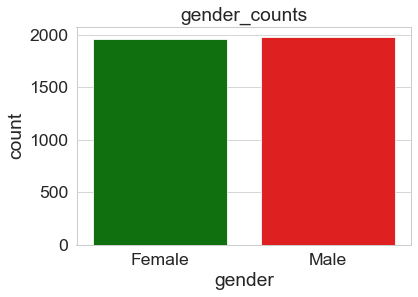

     partner_counts
No             2027
Yes            1910


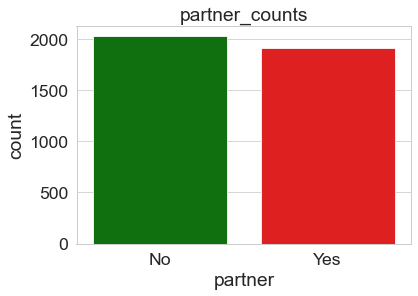

     dependents_counts
No                2745
Yes               1192


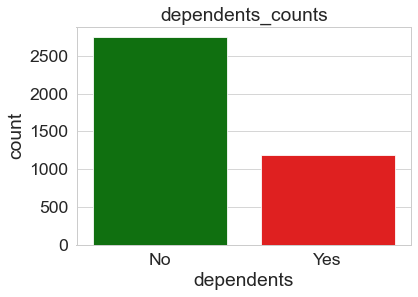

     phone_service_counts
Yes                  3564
No                    373


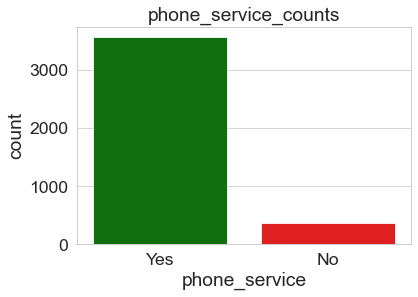

                  multiple_lines_counts
No                                 1895
Yes                                1669
No phone service                    373


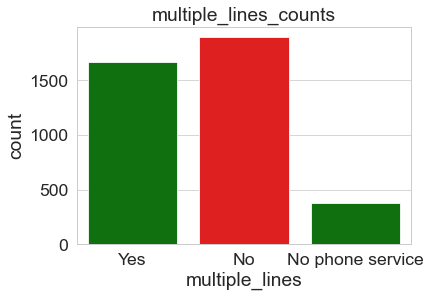

                     online_security_counts
No                                     1918
Yes                                    1152
No internet service                     867


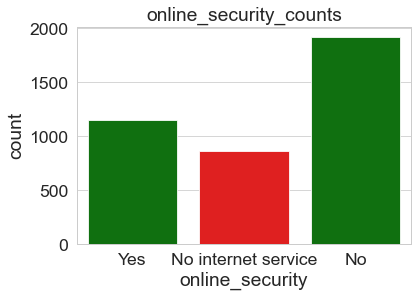

                     online_backup_counts
No                                   1697
Yes                                  1373
No internet service                   867


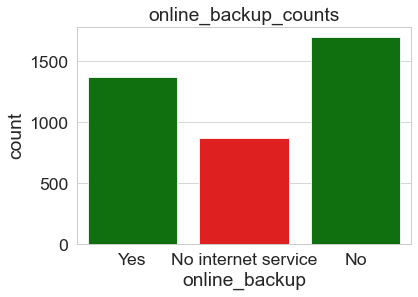

                     device_protection_counts
No                                       1693
Yes                                      1377
No internet service                       867


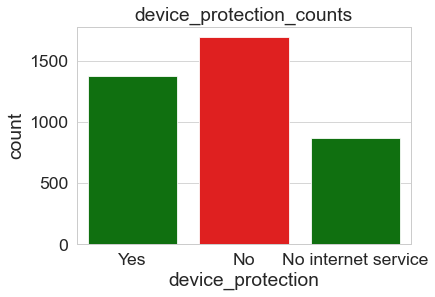

                     tech_support_counts
No                                  1931
Yes                                 1139
No internet service                  867


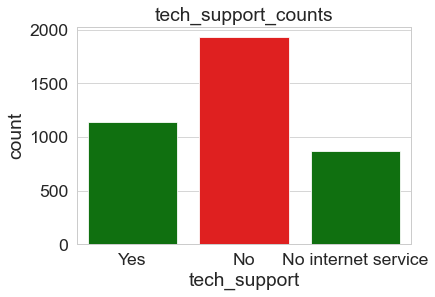

                     streaming_tv_counts
No                                  1549
Yes                                 1521
No internet service                  867


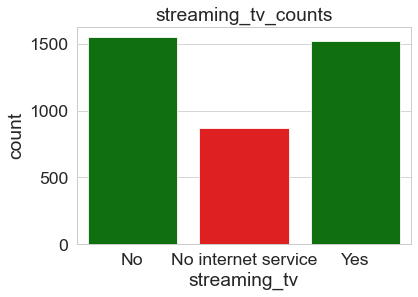

                     streaming_movies_counts
Yes                                     1541
No                                      1529
No internet service                      867


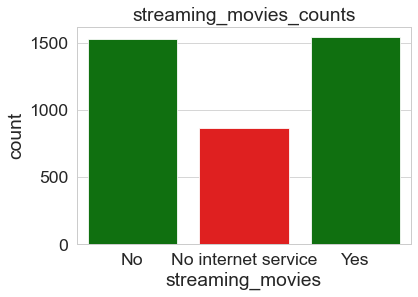

     paperless_billing_counts
Yes                      2324
No                       1613


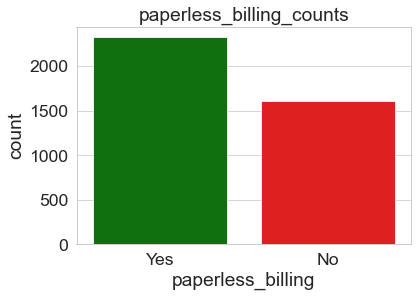

     churn_counts
No           2891
Yes          1046


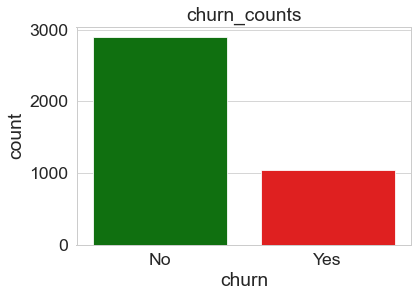

                contract_type_counts
Month-to-month                  2165
Two year                         957
One year                         815


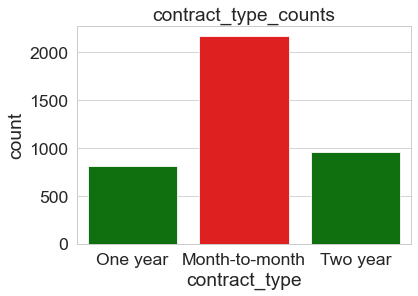

             internet_service_type_counts
Fiber optic                          1722
DSL                                  1348
None                                  867


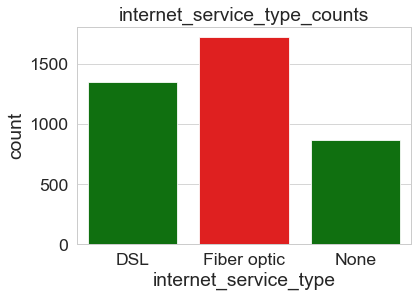

                           payment_type_counts
Electronic check                          1289
Credit card (automatic)                    895
Mailed check                               891
Bank transfer (automatic)                  862


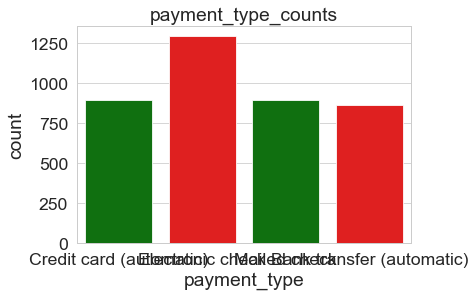

In [193]:
# for each of those columns
for col in cat_vars:
    
    # display a frequency table
    print(pd.DataFrame(train[col].value_counts())
          .rename(columns={col: f'{col}_counts'}))
    
    # display a bar plot of those frequencies
    sns.countplot(data=train,
                  x=col, palette=['#008000','#FF0000'])
    plt.title(f'{col}_counts')
    plt.show()

<Figure size 576x432 with 0 Axes>

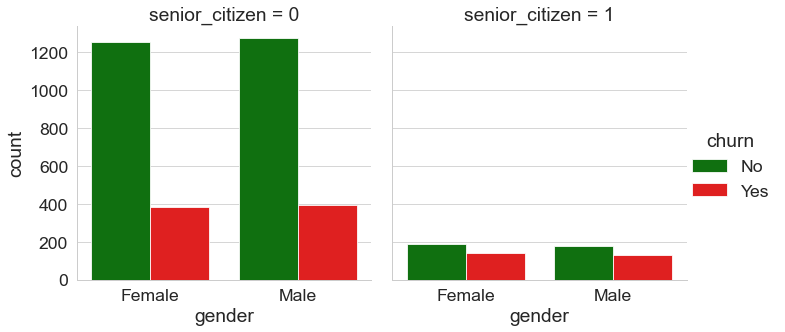

In [190]:
# bivariate analysis
plt.figure(figsize=(8,6))
sns.catplot(x='gender', hue='churn', col='senior_citizen',palette=['#008000','#FF0000'], kind='count', data=train)

In [111]:
by_gender_senior = train.groupby(['senior_citizen', 'gender'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'Ratio'}).reset_index().sort_values('senior_citizen')
by_gender_senior

,senior_citizen,gender,churn,Ratio
0,0,Female,No,0.766361
1,0,Female,Yes,0.233639
2,0,Male,No,0.764247
3,0,Male,Yes,0.235753
4,1,Female,No,0.573620
5,1,Female,Yes,0.426380
6,1,Male,No,0.572816
7,1,Male,Yes,0.427184


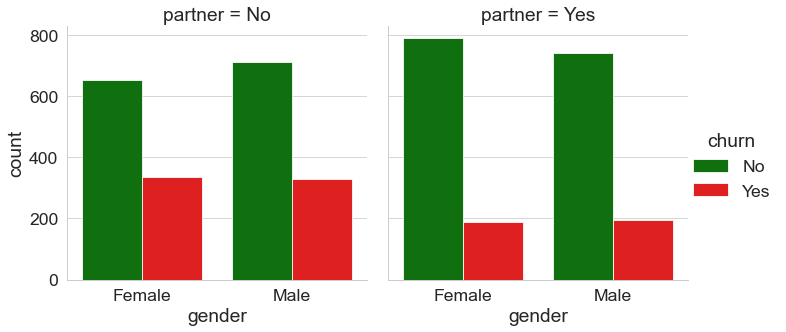

In [191]:
sns.catplot(x= 'gender', hue= 'churn',col='partner', kind= 'count', palette=['#008000','#FF0000'], data= train)

In [114]:
by_gender_partner = train.groupby(['gender', 'partner'])['churn'].value_counts(normalize=True).to_frame().rename(columns={'churn': 'Ratio'}).reset_index().sort_values('gender')
by_gender_partner

,gender,partner,churn,Ratio
0,Female,No,No,0.661258
1,Female,No,Yes,0.338742
2,Female,Yes,No,0.808205
3,Female,Yes,Yes,0.191795
4,Male,No,No,0.683958
5,Male,No,Yes,0.316042
6,Male,Yes,No,0.790374
7,Male,Yes,Yes,0.209626


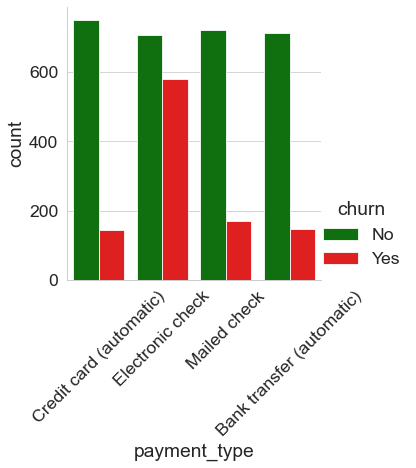

In [192]:
sns.catplot(x='payment_type', hue='churn', kind='count', palette=['#008000','#FF0000'], data=train)
plt.xticks(rotation=45)
plt.show()

In [119]:
pd.crosstab(train['payment_type'], train['churn'], normalize=0)

churn,No,Yes
payment_type,,
Bank transfer (automatic),0.827146,0.172854
Credit card (automatic),0.837989,0.162011
Electronic check,0.549263,0.450737
Mailed check,0.808081,0.191919


In [213]:
def plot_services(df):
    copy = df[df.internet_service_type != 'None']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.online_security.value_counts(), labels = ['Yes', 'No'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.online_backup.value_counts(), labels = ['Yes', 'No'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.device_protection.value_counts(), labels = ['Yes', 'No'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.tech_support.value_counts(), labels = ['Yes', 'No'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.streaming_tv.value_counts(), labels = ['Yes', 'No'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(266)
    plt.pie(copy.streaming_movies.value_counts(), labels = ['Yes', 'No'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    

In [215]:
def plot_services_churn(df):
    copy = df[df.internet_service_type != 'None']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    copy1 = copy[copy.online_security == 'Yes']
    plt.pie(copy1.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(262)
    copy2 = copy[copy.online_backup == 'Yes']
    plt.pie(copy2.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(263)
    copy3 = copy[copy.device_protection == 'Yes']
    plt.pie(copy3.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(264)
    copy4 = copy[copy.tech_support == 'Yes']
    plt.pie(copy4.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(265)
    copy5 = copy[copy.streaming_tv == 'Yes']
    plt.pie(copy5.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(266)
    copy6 = copy[copy.streaming_movies == 'Yes']
    plt.pie(copy6.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(267)
    copy7 = copy[copy.online_security == 'No']
    plt.pie(copy7.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('No Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(268)
    copy8 = copy[copy.online_backup == 'No']
    plt.pie(copy8.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('No Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(269)
    copy9 = copy[copy.device_protection == 'No']
    plt.pie(copy9.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('No Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2, 6, 10)
    copy10 = copy[copy.tech_support == 'No']
    plt.pie(copy10.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('No Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2, 6, 11)
    copy11 = copy[copy.streaming_tv == 'No']
    plt.pie(copy11.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Not Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2, 6, 12)
    copy12 = copy[copy.streaming_movies == 'No']
    plt.pie(copy12.churn.value_counts(), labels = ['No Churn', 'Churn'], colors="gr", autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Not Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()

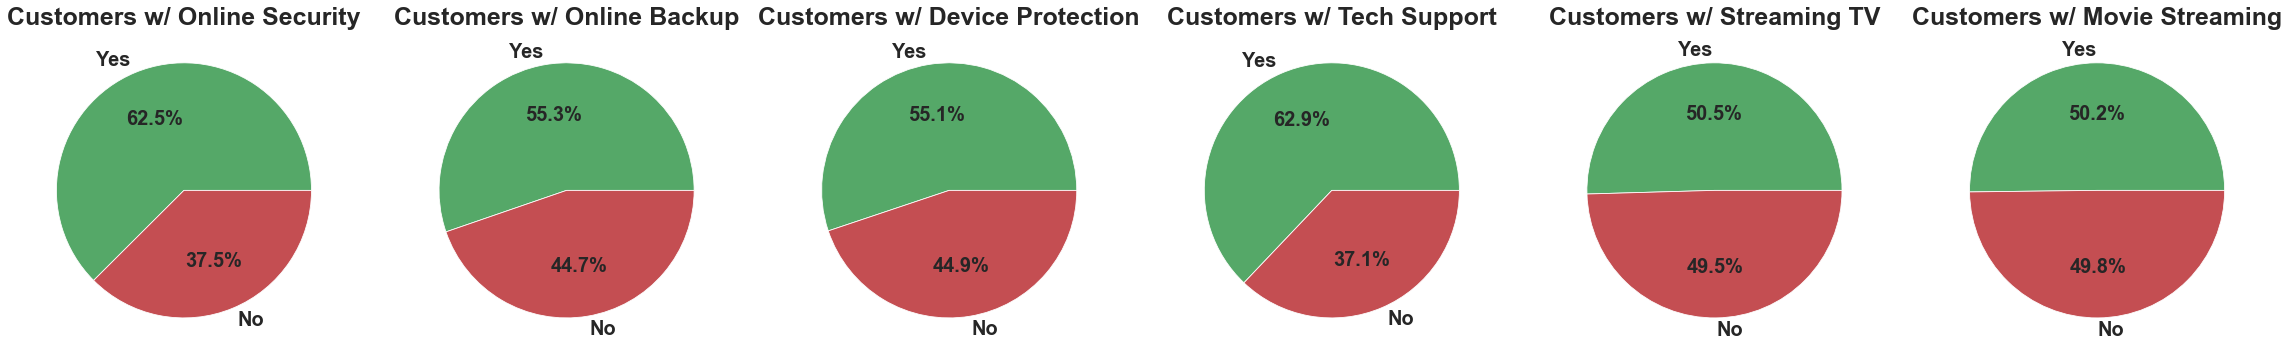

In [214]:
plot_services(train)

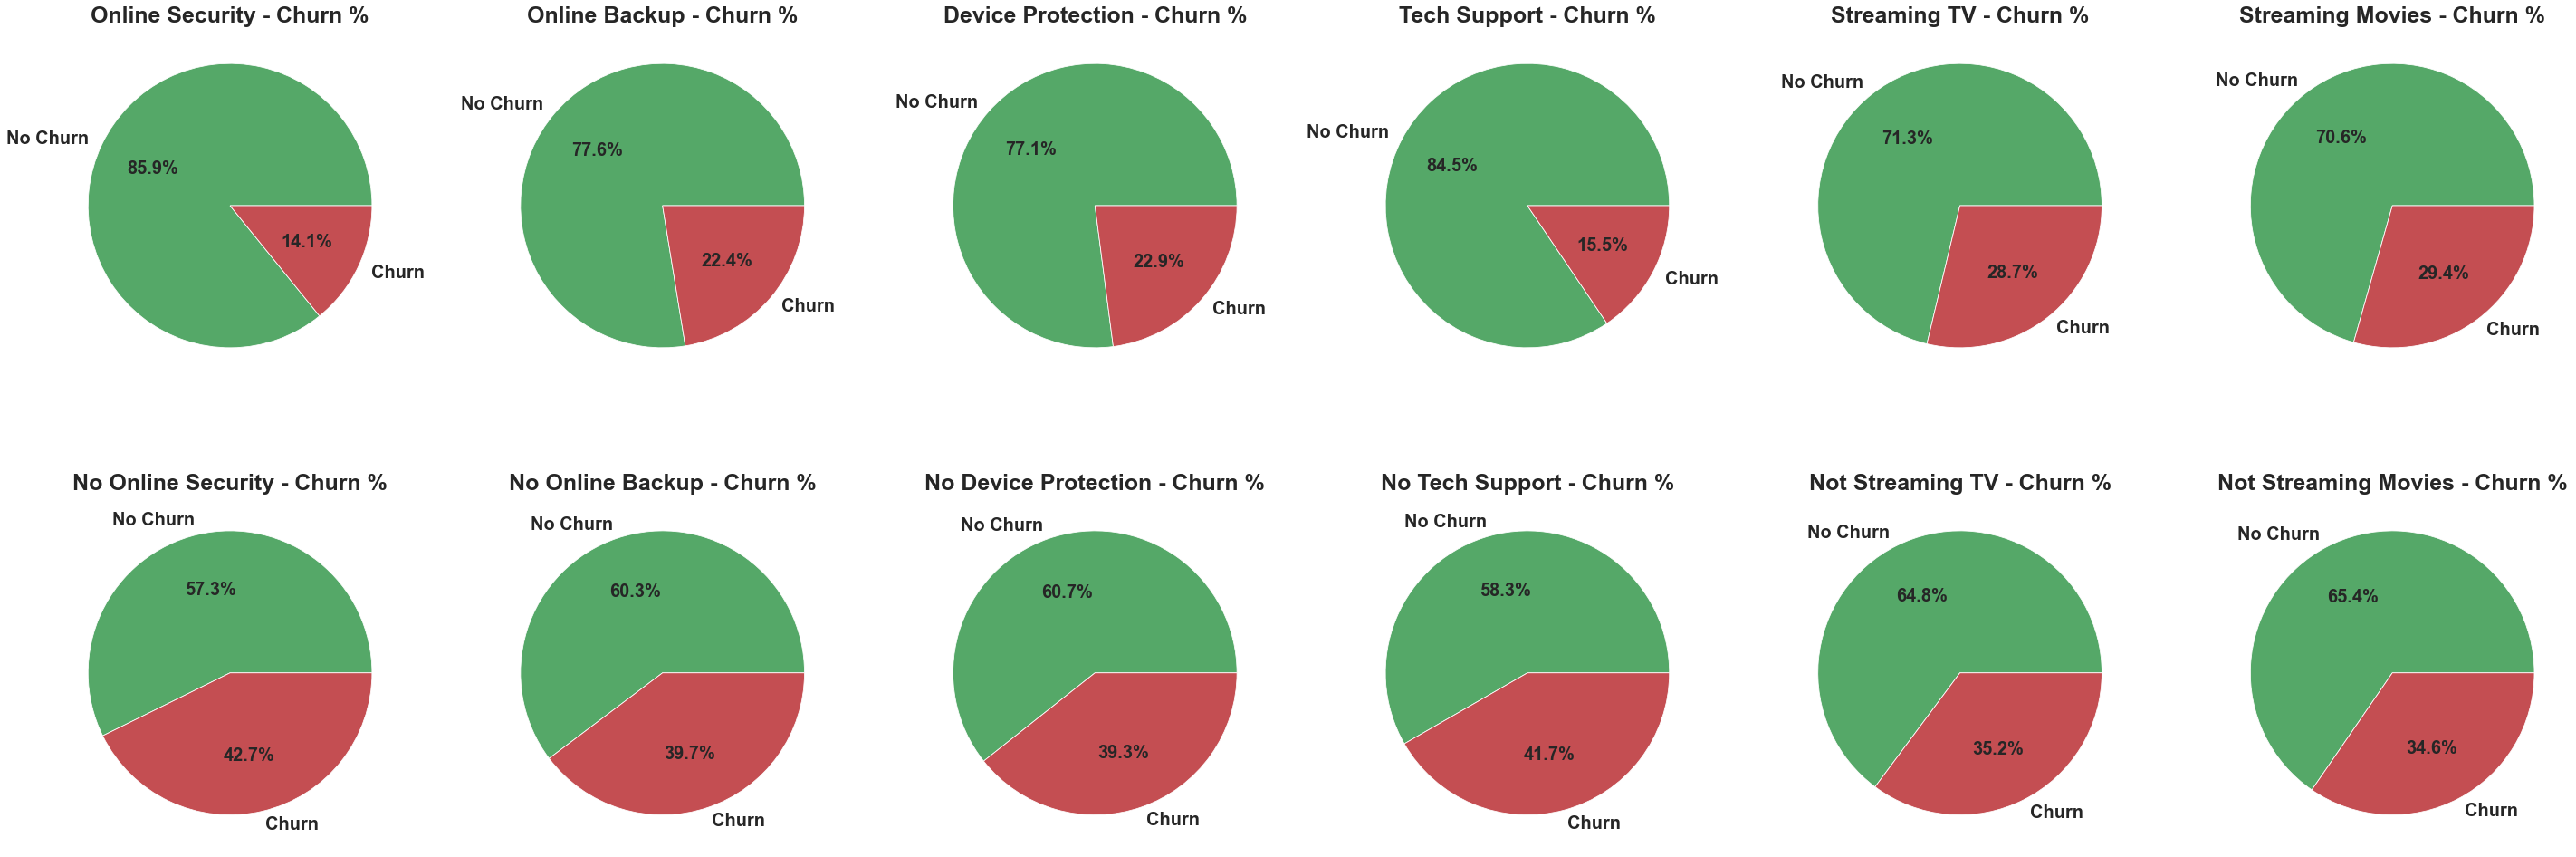

In [212]:
plot_services_churn(train)

In [221]:
def plot_contracts(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.contract_type.value_counts(), labels = ['Month-to-month', '1 year', '2 year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('contract_type')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('contract_type', y = 'pct_total', hue = 'churn', palette=['#008000','#FF0000'], data = copy)
    a.set_title('% Churn - Contract Type', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
   
   

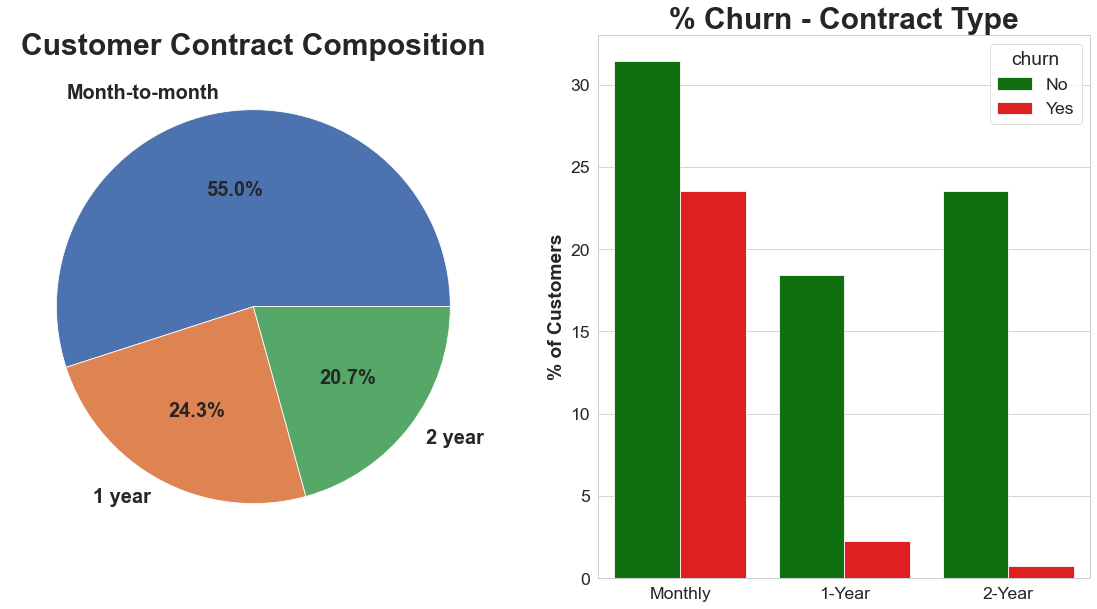

In [222]:
plot_contracts(train)

In [225]:
def plot_pay_methods(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.payment_type.value_counts(), labels = ['Electronic check', 'Mailed check' , 'Bank transfer (automatic)', 'Credit card (automatic)'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
    plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(132)
    copy = copy.groupby('payment_type')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df))*100
    a = sns.barplot('payment_type', 'pct_total', 'churn', palette=['#008000','#FF0000'], data = copy)
    a.set_title('% Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
   
    
    plt.tight_layout()

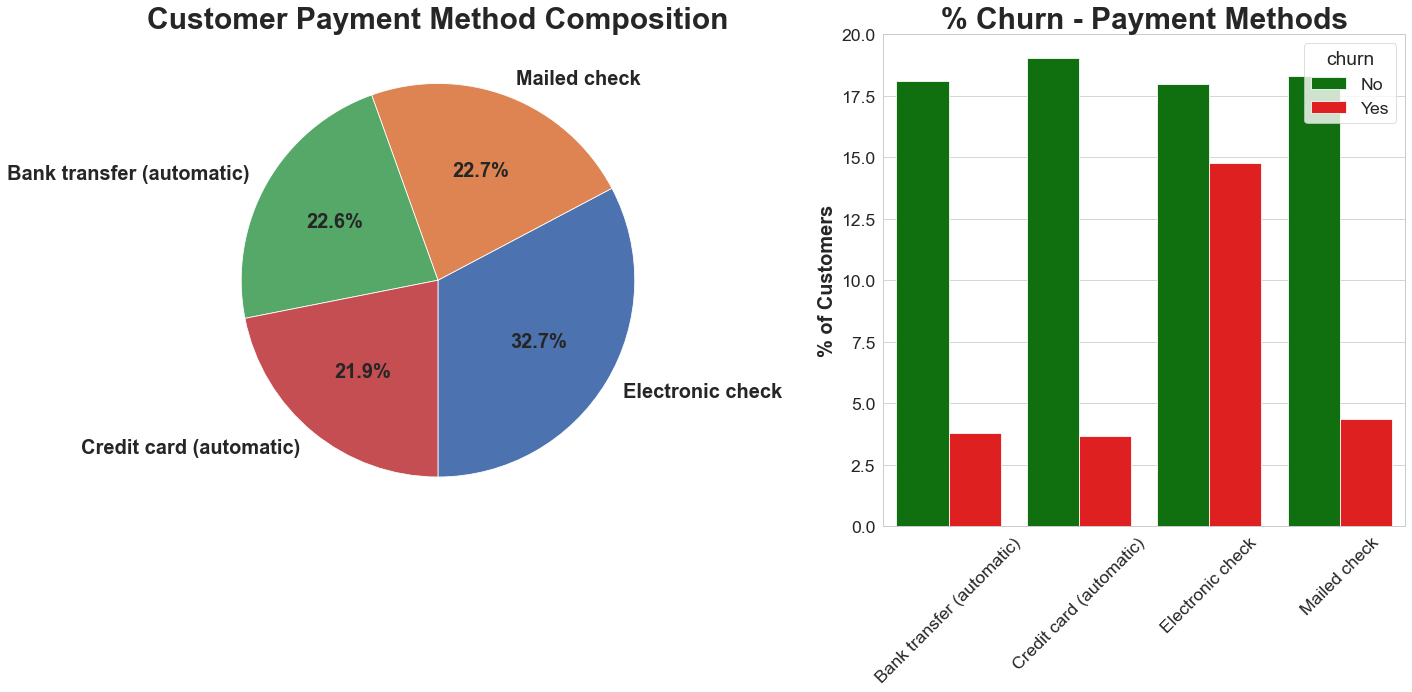

In [226]:
plot_pay_methods(train)